#### Note: This is a simplified and more explainable version from: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torch.autograd import Variable
from torchvision import datasets, models, transforms
import os
import numpy as np

In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
#class torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)
#transforms.RandomResizedCrop(224) --> A crop of random size (default: of 0.08 to 1.0) of the original size and a
#random aspect ratio (default: of 3/4 to 4/3) of the original aspect ratio is made.
#This crop is finally resized to given size (224 in this case).
#transforms.CenterCrop(224)--> Crops the image at the center. 224 is the Desired output size of the crop.
#class torchvision.transforms.Normalize(mean, std)
#Normalize a tensor image with mean and standard deviation. Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels,
#this transform will normalize each channel of the input torch.Tensor i.e.
#input[channel] = (input[channel] - mean[channel]) / std[channel]
#Parameters:     mean (sequence) – Sequence of means for each channel.
#                std (sequence) – Sequence of standard deviations for each channel.
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

这段代码定义了一个名为 `data_transforms` 的字典，其中包含了两个键 `'train'` 和 `'val'`，分别对应训练集和验证集的数据预处理操作。以下是对每一行代码的解释：

1. `data_transforms = {`：定义一个字典 `data_transforms`。
2. `'train': transforms.Compose([`：为训练集定义一系列的图像预处理操作，使用 `transforms.Compose` 将多个操作组合在一起。
3. `transforms.RandomResizedCrop(224),`：随机裁剪图像并调整到 224x224 的大小。
4. `transforms.RandomHorizontalFlip(),`：随机水平翻转图像。
5. `transforms.ToTensor(),`：将图像转换为 PyTorch 的张量格式。
6. `transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])`：使用给定的均值和标准差对图像进行归一化。
7. `]),`：结束训练集的预处理操作定义。
8. `'val': transforms.Compose([`：为验证集定义一系列的图像预处理操作，使用 `transforms.Compose` 将多个操作组合在一起。
9. `transforms.Resize(256),`：将图像调整到 256 的大小。
10. `transforms.CenterCrop(224),`：从图像中心裁剪出 224x224 的大小。
11. `transforms.ToTensor(),`：将图像转换为 PyTorch 的张量格式。
12. `transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])`：使用给定的均值和标准差对图像进行归一化。
13. `])`：结束验证集的预处理操作定义。
14. `}`：结束字典定义。


In [3]:
# prompt: if my file is hymenoptera_data.zip file, then I need to unzip it first with python

import zipfile

# Assuming 'hymenoptera_data.zip' is in your current working directory
with zipfile.ZipFile('hymenoptera_data.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [4]:
data_dir = 'hymenoptera_data'
#Create a dictionary that contains the information of the images in both the training and validation set
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'val']}
#这行代码创建了一个字典 image_datasets，其中包含了训练集和验证集的图像信息。datasets.ImageFolder 用于从文件夹中加载图像数据，
#os.path.join(data_dir, x) 用于生成训练集和验证集的路径，data_transforms[x] 是对图像进行预处理的变换。

#Create a dictionary that contians the data loader
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size=4,
                                              shuffle=True) for x in ['train', 'val']}
#这行代码创建了一个字典 image_datasets，其中包含了训练集和验证集的图像信息。datasets.ImageFolder 用于从文件夹中加载图像数据，
#os.path.join(data_dir, x) 用于生成训练集和验证集的路径，data_transforms[x] 是对图像进行预处理的变换。

#Create a dictionary that contains the size of each dataset (training and validation)
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
#这行代码创建了一个字典 dataset_sizes，其中包含了训练集和验证集的大小（即图像的数量）

#Get the class names
class_names = image_datasets['train'].classes
#这行代码获取了训练集中的类别名称，并将其存储在 class_names 变量中

#Print out the results
print("Class Names: {}".format(class_names))
print("There are {} batches in the training set".format(len(dataloaders['train'])))
print("There are {} batches in the test set".format(len(dataloaders['val'])))
print("There are {} training images".format(dataset_sizes['train']))
print("There are {} testing images".format(dataset_sizes['val']))

Class Names: ['ants', 'bees']
There are 61 batches in the training set
There are 39 batches in the test set
There are 244 training images
There are 153 testing images


In [5]:
dataset_sizes

{'train': 244, 'val': 153}

In [6]:
class_names

['ants', 'bees']

In [7]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7d1c3a245600>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7d1c3a245510>}

In [8]:
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 244
     Root location: hymenoptera_data/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'val': Dataset ImageFolder
     Number of datapoints: 153
     Root location: hymenoptera_data/val
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

In [9]:
#Load the ResNet
model_conv = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 190MB/s]


In [10]:
#Freeze all layers in the network
for param in model_conv.parameters():
    param.requires_grad = False
#这段代码冻结了网络中的所有层。通过将每个参数的 requires_grad 属性设置为 False，
#我们可以防止这些参数在训练过程中被更新。这通常用于迁移学习，以保留预训练模型的特征提取能力。

In [11]:
#Get the number of inputs of the last layer (or number of neurons in the layer preceeding the last layer)
num_ftrs = model_conv.fc.in_features
#这行代码获取了最后一层（全连接层）的输入特征数，
#即最后一层之前的神经元数量。model_conv.fc.in_features 返回全连接层的输入特征数。

#Reconstruct the last layer (output layer) to have only two classes
model_conv.fc = nn.Linear(num_ftrs, 2)
#这行代码重新构建了最后一层（输出层），使其输出两个类别。nn.Linear(num_ftrs, 2)
#创建了一个新的全连接层，其中 num_ftrs 是输入特征数，2 是输出类别数。

In [12]:
model_conv.fc

Linear(in_features=512, out_features=2, bias=True)

In [13]:
if torch.cuda.is_available():
    model_conv = model_conv.cuda()

In [14]:
#Understand what's happening
iteration = 0
correct = 0
for inputs,labels in dataloaders['train']:
    if iteration==1:
        break
    inputs = Variable(inputs)
    labels = Variable(labels)
    if torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
    print("For one iteration, this is what happens:")
    print("Input Shape:",inputs.shape)
    print("Labels Shape:",labels.shape)
    print("Labels are: {}".format(labels))
    output = model_conv(inputs)
    print("Output Tensor:", output)
    print("Outputs Shape",output.shape)
    _, predicted = torch.max(output, 1)
    print("Predicted:", predicted)
    print("Predicted Shape",predicted.shape)
    correct += (predicted == labels).sum()
    print("Correct Predictions:",correct)

    iteration += 1

For one iteration, this is what happens:
Input Shape: torch.Size([4, 3, 224, 224])
Labels Shape: torch.Size([4])
Labels are: tensor([0, 0, 0, 0], device='cuda:0')
Output Tensor: tensor([[-0.1606, -0.2331],
        [ 0.3165, -0.5055],
        [-0.3298,  0.1133],
        [ 0.7964, -0.5258]], device='cuda:0', grad_fn=<AddmmBackward0>)
Outputs Shape torch.Size([4, 2])
Predicted: tensor([0, 0, 1, 0], device='cuda:0')
Predicted Shape torch.Size([4])
Correct Predictions: tensor(3, device='cuda:0')


好的，我会逐行解释这段代码，并解释输出结果的含义。

```python
#Understand what's happening
iteration = 0
correct = 0
```
这两行代码初始化了两个变量：`iteration` 用于记录迭代次数，`correct` 用于记录正确预测的数量。

```python
for inputs, labels in dataloaders['train']:
    if iteration == 1:
        break
```
这段代码从训练数据加载器 `dataloaders['train']` 中迭代获取输入数据 `inputs` 和标签 `labels`。`if iteration == 1: break` 用于在第一次迭代后退出循环，因此只会执行一次迭代。

```python
    inputs = Variable(inputs)
    labels = Variable(labels)
```
这两行代码将 `inputs` 和 `labels` 转换为 `Variable` 类型。`Variable` 是 PyTorch 中的一个包装器，用于自动求导。

```python
    if torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
```
这段代码检查是否有可用的 GPU，如果有，则将 `inputs` 和 `labels` 移动到 GPU 上进行计算。

```python
    print("For one iteration, this is what happens:")
    print("Input Shape:", inputs.shape)
    print("Labels Shape:", labels.shape)
    print("Labels are: {}".format(labels))
```
这几行代码打印出当前迭代的输入形状、标签形状和标签值。

```python
    output = model_conv(inputs)
    print("Output Tensor:", output)
    print("Outputs Shape", output.shape)
```
这两行代码将输入数据传递给模型 `model_conv`，并打印出模型的输出张量和输出形状。

```python
    _, predicted = torch.max(output, 1)
    print("Predicted:", predicted)
    print("Predicted Shape", predicted.shape)
```
这几行代码使用 `torch.max` 函数获取输出张量中每行的最大值及其索引。`predicted` 是预测的类别索引，并打印出预测结果和预测结果的形状。

```python
    correct += (predicted == labels).sum()
    print("Correct Predictions:", correct)
```
这两行代码计算预测结果与实际标签相等的数量，并将其累加到 `correct` 变量中，然后打印出正确预测的数量。

```python
    iteration += 1
```
这行代码将迭代次数 `iteration` 增加 1。

### 输出结果解释
```
For one iteration, this is what happens:
Input Shape: torch.Size([4, 3, 224, 224])
Labels Shape: torch.Size([4])
Labels are: tensor([0, 0, 0, 0], device='cuda:0')
Output Tensor: tensor([[-0.1606, -0.2331],
        [ 0.3165, -0.5055],
        [-0.3298,  0.1133],
        [ 0.7964, -0.5258]], device='cuda:0', grad_fn=<AddmmBackward0>)
Outputs Shape torch.Size([4, 2])
Predicted: tensor([0, 0, 1, 0], device='cuda:0')
Predicted Shape torch.Size([4])
Correct Predictions: tensor(3, device='cuda:0')
```

1. **Input Shape**: `torch.Size([4, 3, 224, 224])` 表示输入张量的形状为 `[4, 3, 224, 224]`，即 4 张图像，每张图像有 3 个通道（RGB），每个通道的大小为 224x224。
2. **Labels Shape**: `torch.Size([4])` 表示标签张量的形状为 `[4]`，即有 4 个标签。
3. **Labels are**: `tensor([0, 0, 0, 0], device='cuda:0')` 表示标签的值为 `[0, 0, 0, 0]`，所有标签都为 0，且在 GPU 上。
4. **Output Tensor**: `tensor([[-0.1606, -0.2331], [ 0.3165, -0.5055], [-0.3298, 0.1133], [ 0.7964, -0.5258]], device='cuda:0', grad_fn=<AddmmBackward0>)` 表示模型的输出张量，每行对应一个输入图像的输出，包含两个值（对应两个类别的分数）。
5. **Outputs Shape**: `torch.Size([4, 2])` 表示输出张量的形状为 `[4, 2]`，即 4 个图像，每个图像有 2 个类别的分数。
6. **Predicted**: `tensor([0, 0, 1, 0], device='cuda:0')` 表示预测的类别索引，分别为 `[0, 0, 1, 0]`。
7. **Predicted Shape**: `torch.Size([4])` 表示预测结果的形状为 `[4]`，即有 4 个预测类别。
8. **Correct Predictions**: `tensor(3, device='cuda:0')` 表示正确预测的数量为 3。

总结来说，这段代码展示了在一次迭代中，模型如何处理输入数据，生成输出，并计算预测结果与实际标签的匹配情况。

In [15]:
criterion = nn.CrossEntropyLoss()#这行代码定义了损失函数 criterion，使用的是交叉熵损失函数 nn.CrossEntropyLoss()。交叉熵损失函数通常用于多分类任务。
optimizer = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)#这行代码定义了损失函数 criterion，使用的是交叉熵损失函数 nn.CrossEntropyLoss()。交叉熵损失函数通常用于多分类任务。
#Try experimenting with: optim.Adam(model_conv.fc.parameters(), lr=0.001)
#这行注释建议尝试使用 Adam 优化器来替代 SGD 优化器。Adam 优化器通常在训练深度学习模型时表现更好，因为它能够自适应调整学习率。
#Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)#这行代码定义了学习率调度器 exp_lr_scheduler，使用的是 StepLR 调度器。StepLR 调度器每隔 step_size 个 epoch 将学习率乘以 gamma。在这里，step_size=7 表示每 7 个 epoch 调整一次学习率，gamma=0.1 表示将学习率乘以 0.1。

In [16]:
#This is to demonstrate what happens in the background of scheduler.step()
#No need to run this cell unless you want to create your own scheduler
def lr_scheduler(optimizer, epoch, init_lr=0.001, lr_decay_epoch=7):
    """Decay learning rate by a factor of 0.1 every lr_decay_epoch epochs."""
    lr = init_lr * (0.1**(epoch // lr_decay_epoch))

    if epoch % lr_decay_epoch == 0:
        print('LR is set to {}'.format(lr))

    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

    return optimizer
#因为如果你不使用它，那么你的模型就会在高损失之间跳跃且损失低或准确度高且准确度低。因此，对其进行定义非常重要。

好的，我会逐行解释这段代码，并提供一些优化建议。

```python
#This is to demonstrate what happens in the background of scheduler.step()
#No need to run this cell unless you want to create your own scheduler
```
这段注释解释了这段代码的目的：展示在调用 `scheduler.step()` 时，学习率调度器在后台发生了什么。除非你想创建自己的调度器，否则不需要运行这段代码。

```python
def lr_scheduler(optimizer, epoch, init_lr=0.001, lr_decay_epoch=7):
    """Decay learning rate by a factor of 0.1 every lr_decay_epoch epochs."""
```
这行代码定义了一个名为 `lr_scheduler` 的函数，用于每隔 `lr_decay_epoch` 个 epoch 将学习率衰减 0.1 倍。函数接受四个参数：
- `optimizer`：优化器对象。
- `epoch`：当前的 epoch 数。
- `init_lr`：初始学习率，默认为 0.001。
- `lr_decay_epoch`：学习率衰减的周期，默认为 7 个 epoch。

```python
    lr = init_lr * (0.1**(epoch // lr_decay_epoch))
```
这行代码计算当前 epoch 的学习率。`epoch // lr_decay_epoch` 计算当前 epoch 已经过了多少个 `lr_decay_epoch`，然后将初始学习率 `init_lr` 乘以 0.1 的这个次方。

```python
    if epoch % lr_decay_epoch == 0:
        print('LR is set to {}'.format(lr))
```
这段代码检查当前 epoch 是否是 `lr_decay_epoch` 的倍数，如果是，则打印当前的学习率。

```python
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
```
这段代码遍历优化器的参数组，并将每个参数组的学习率设置为计算出的学习率 `lr`。

```python
    return optimizer
```
这行代码返回更新后的优化器对象。

In [17]:
num_epochs = 25
for epoch in range (num_epochs):
    exp_lr_scheduler.step()
    #Reset the correct to 0 after passing through all the dataset
    correct = 0
    for images,labels in dataloaders['train']:
        images = Variable(images)
        labels = Variable(labels)
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        optimizer.zero_grad()#这行代码在每次反向传播之前将优化器的梯度缓存清零
        outputs = model_conv(images)
        loss = criterion(outputs, labels) #这行代码计算模型输出与实际标签之间的损失，使用之前定义的交叉熵损失函数 criterion
        loss.backward()#执行反向传播，计算损失相对于模型参数的梯度
        optimizer.step()#更新模型参数，使用之前定义的优化器 optimizer
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        #这两行代码使用 torch.max 函数获取输出张量中每行的最大值及其索引。predicted 是预测的类别索引，然后计算预测结果与实际标签相等的数量，并将其累加到 correct 变量中

    train_acc = 100 * correct / dataset_sizes['train']
    print ('Epoch [{}/{}], Loss: {:.4f}, Train Accuracy: {}%'
            .format(epoch+1, num_epochs, loss.item(), train_acc))

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Epoch [1/25], Loss: 0.5713, Train Accuracy: 71.72130584716797%
Epoch [2/25], Loss: 2.5441, Train Accuracy: 78.2786865234375%
Epoch [3/25], Loss: 0.0563, Train Accuracy: 79.91802978515625%
Epoch [4/25], Loss: 2.0902, Train Accuracy: 78.68852233886719%
Epoch [5/25], Loss: 0.0737, Train Accuracy: 85.24589538574219%
Epoch [6/25], Loss: 0.0399, Train Accuracy: 84.42622375488281%
Epoch [7/25], Loss: 0.3399, Train Accuracy: 84.01638793945312%
Epoch [8/25], Loss: 0.8360, Train Accuracy: 83.19671630859375%
Epoch [9/25], Loss: 0.0686, Train Accuracy: 86.88523864746094%
Epoch [10/25], Loss: 0.1726, Train Accuracy: 84.42622375488281%
Epoch [11/25], Loss: 0.1092, Train Accuracy: 84.8360595703125%
Epoch [12/25], Loss: 0.0499, Train Accuracy: 89.75409698486328%
Epoch [13/25], Loss: 0.3054, Train Accuracy: 84.01638793945312%
Epoch [14/25], Loss: 0.1211, Train Accuracy: 84.8360595703125%
Epoch [15/25], Loss: 0.2393, Train Accuracy: 86.06556701660156%
Epoch [16/25], Loss: 0.3852, Train Accuracy: 85.6557

In [18]:
# Test the model
model_conv.eval()#这行代码将模型 model_conv 设置为评估模式。评估模式会关闭 dropout 和 batch normalization 等训练时特有的操作
with torch.no_grad():#这行代码使用 with torch.no_grad() 上下文管理器，表示在这个代码块中不需要计算梯度，从而节省内存和计算资源。
    correct = 0
    total = 0 #：correct 用于记录正确预测的数量，total 用于记录总的样本数量
    for (images, labels) in dataloaders['val']:
        images = Variable(images)
        labels = Variable(labels)
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        outputs = model_conv(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #这两行代码更新总样本数量 total 和正确预测数量 correct。labels.size(0) 返回当前批次的样本数量，(predicted == labels).sum().item() 计算当前批次中预测正确的样本数量。

    print('Test Accuracy: {:.3f} %'.format(100 * correct / total))

Test Accuracy: 96.732 %


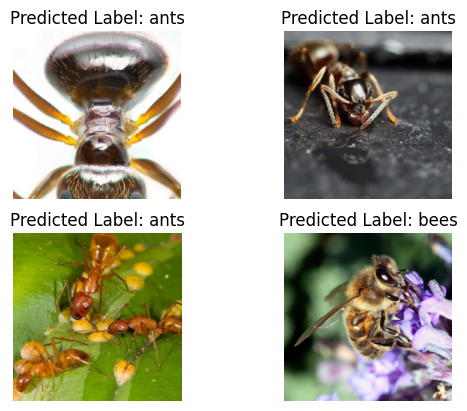

In [19]:
#Visualize some predictions
import matplotlib.pyplot as plt
fig = plt.figure()
shown_batch = 0
index = 0
with torch.no_grad():
    for (images, labels) in dataloaders['val']:#然后从验证数据加载器 dataloaders['val'] 中迭代获取输入数据 images 和标签 labels。如果已经显示了一个批次的图像，则退出循环。
        if shown_batch == 1:
            break
        shown_batch += 1
        images = Variable(images)
        labels = Variable(labels)
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        outputs = model_conv(images)                            #The output is of shape (4,2)
        _, preds = torch.max(outputs, 1)                        #The pred is of shape (4) --> [ 0,  0,  0,  1]

        for i in range(4):
            index += 1
            ax = plt.subplot(2,2,index)
            ax.axis('off')
            ax.set_title('Predicted Label: {}'.format(class_names[preds[i]]))
            #这段代码遍历当前批次中的每张图像，并在图形中创建一个子图。plt.subplot(2, 2, index)
            #创建一个 2x2 的子图布局，并选择当前索引的子图。ax.axis('off') 关闭子图的坐标轴，ax.set_title 设置子图的标题为预测的类别名称。
            input_img = images.cpu().data[i]                    #Get the tensor of the image, and put it to cpu
            inp = input_img.numpy().transpose((1, 2, 0))        #If we have a tensor of shape (2,3,4) --> it becomes (3,4,2)
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225]) #因为一开始做了正则化, 现在就是还原
            inp = std * inp + mean
            inp = np.clip(inp, 0, 1)
            plt.imshow(inp)
            #这段代码遍历当前批次中的每张图像，并在图形中创建一个子图。plt.subplot(2, 2, index)
            #创建一个 2x2 的子图布局，并选择当前索引的子图。ax.axis('off') 关闭子图的坐标轴，ax.set_title 设置子图的标题为预测的类别名称。

残差网络应用于迁移学习，

它替换了你上一个完全连接的层。

你替换了共振最后一个完全连接层

用你自己的层只分类两个类别，可以吗？

你绝对可以玩一下，添加更多类别，

你可以做任何你想做的事，这完全取决于你。